In [25]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

In [27]:
data_frame = pd.read_csv("G:\\amazon ml\\dataset\\train.csv")

In [28]:
data_frame.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,NaN,1650,2125.980000
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",NaN,2755,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574
4,283658,The United Empire Loyalists: A Chronicle of th...,NaN,NaN,6112,598.424000


In [5]:
print(len(data_frame))

2249698


In [29]:
data_frame = data_frame.drop_duplicates(subset = ['PRODUCT_ID'])
print(len(data_frame))
data_frame = data_frame.dropna()
print(len(data_frame))
data_frame.head()

2249698
1038458


,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574
5,2152929,HINS Metal Bucket Shape Plant Pot for Indoor &...,"[Simple and elegant, great for displaying indo...",HINS Brings you the most Elegant Looking Pot w...,5725,950.000000
7,2026580,Delavala Self Adhesive Kitchen Backsplash Wall...,[HIGH QUALITY PVC MATERIAL: The kitchen alumin...,<p><strong>Aluminum Foil Stickers-good kitchen...,6030,984.251967
9,2998633,Hexwell Essential oil for Home Fragrance Oil A...,[100% Pure And Natural Essential Oil Or Fragra...,"Transform your home, workplace or hotel room i...",8201,393.700787


In [7]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1038458 entries, 2 to 2249697
Data columns (total 6 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   PRODUCT_ID       1038458 non-null  int64  
 1   TITLE            1038458 non-null  object 
 2   BULLET_POINTS    1038458 non-null  object 
 3   DESCRIPTION      1038458 non-null  object 
 4   PRODUCT_TYPE_ID  1038458 non-null  int64  
 5   PRODUCT_LENGTH   1038458 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 55.5+ MB


In [30]:
prod_len = data_frame['PRODUCT_LENGTH'].values
print(min(prod_len), max(prod_len))

1.0 1885801400.0


In [31]:
# data frame name changed to df

for i in range(4):
# Calculate Z-score for the feature
    z_scores = np.abs((data_frame['PRODUCT_LENGTH'] - data_frame['PRODUCT_LENGTH'].mean()) / data_frame['PRODUCT_LENGTH'].std())

    # Set a threshold for Z-score beyond which data points are considered as outliers
    threshold = 3

    # Remove outliers from the dataframe
    data_frame = data_frame[z_scores < threshold]


In [32]:
df = data_frame
del data_frame

print(len(df))
print(min(df['PRODUCT_LENGTH']), max(df['PRODUCT_LENGTH']))

988781
1.0 5402.0


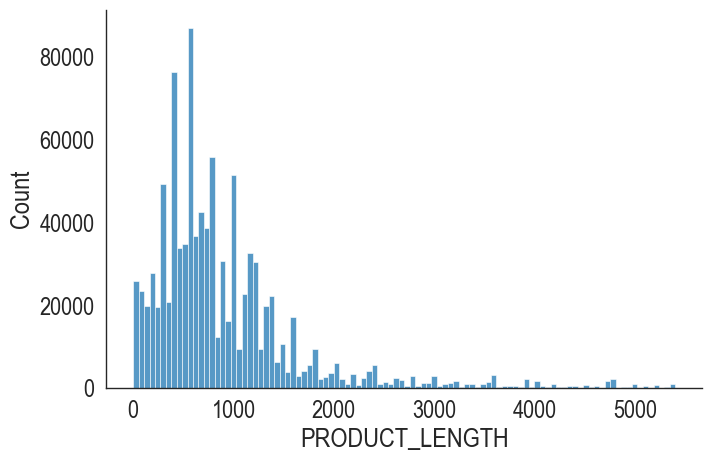

In [33]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data = df, x='PRODUCT_LENGTH',kind="hist", bins = 100, aspect = 1.5)


988781
0.0 8.59452453435256


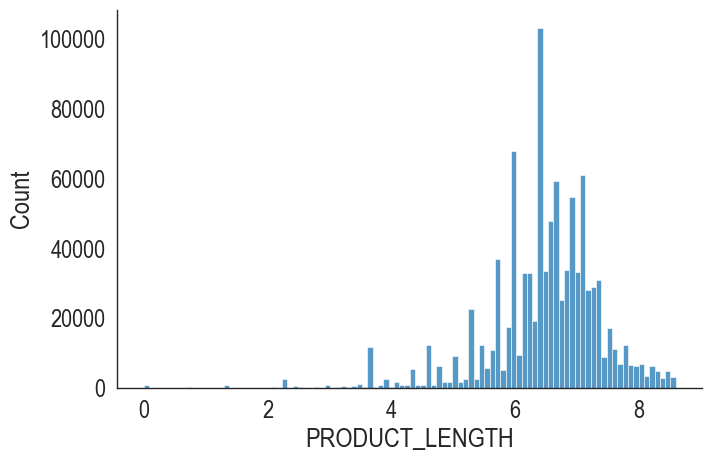

In [46]:
# df

df['PRODUCT_LENGTH'] = np.log(df['PRODUCT_LENGTH'])
    
print(len(df))
print(min(df['PRODUCT_LENGTH']), max(df['PRODUCT_LENGTH']))

sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data = df, x = 'PRODUCT_LENGTH', kind="hist", bins = 100, aspect = 1.5)

In [36]:
# STOP WORDS OPTIMISED
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string 
import re

def clean_text(text):
    # Convert all text to lowercase
    text = text.lower()
   
    # Remove all punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
   
    # Remove all digits
    text = re.sub(r'\d+', '', text)
   
    # Remove all extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
   
    # Remove all stop words (optional)
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
   
    return text

In [39]:
# from 2 -> cols 2,3
# df.iloc[0:, 1] = df.iloc[0:, 1].apply(clean_text)
df.iloc[0:, 2] = df.iloc[0:, 2].apply(clean_text)
df.iloc[0:, 3] = df.iloc[0:, 3].apply(clean_text)

In [51]:
df.iloc[7777, 1]

'printbaba hard plastic girls boys printed back cover realme x pro'

In [18]:
# download required nltk packages
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Welcome\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Welcome\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Welcome\AppData\Roaming\nltk_data...


True

In [3]:
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# define function to map POS tag to WordNet POS tag
def get_wordnet_pos(word):
    """Map POS tag to WordNet POS tag"""
    tag = nltk.pos_tag([word])[0][1]
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# define function to perform lemmatization on a sentence
def lemmatize_sentence(sentence):
    """Perform tokenization and lemmatization on a sentence"""
    # tokenize the sentence
    tokens = word_tokenize(sentence)
   
    # lemmatize each token and append to list
    lemmatized_tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]
   
    # join the tokens to form the sentence
#     lemmatized_sentence = ' '.join(lemmatized_tokens)
   
    return lemmatized_tokens


# apply lemmatization on column "DESCRIPTION" in dataframe df

# df['DESCRIPTION'] = df['DESCRIPTION'].apply(lemmatize_sentence)
# df['TITLE'] = df['TITLE'].apply(lemmatize_sentence)
# df['BULLET_POINTS'] = df['BULLET_POINTS'].apply(lemmatize_sentence)

In [44]:
# label Encoding
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform PRODUCT_TYPE_ID column
df['PRODUCT_TYPE_ID'] = le.fit_transform(df['PRODUCT_TYPE_ID'])

In [47]:
# df.to_csv("sw_checkp.csv")

In [48]:
df.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
2,2765088,priknik horn red electric air horn compressor ...,loud dual tone trumpet horn compatible sxelect...,specifications color red material aluminium vo...,6411,6.617445
3,1594019,alishah womens cotton ankle length leggings co...,made cotton lycra gives ways stretchable comfo...,aishah womens lycra cotton ankel leggings bran...,2663,6.668738
5,2152929,hins metal bucket shape plant pot indoor outdo...,simple elegant great displaying indoor plants ...,hins brings elegant looking pot stand durable ...,5027,6.856462
7,2026580,delavala self adhesive kitchen backsplash wall...,high quality pvc material kitchen aluminum foi...,pstrongaluminum foil stickersgood kitchen help...,5269,6.891882
9,2998633,hexwell essential oil home fragrance oil aroma...,pure natural essential oil fragrance oil bottl...,transform home workplace hotel room personal a...,6982,5.975591


In [52]:
# initialize Porter stemmer
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

# define a function to apply stemming to a text
def apply_stemming(text):
    # tokenize text into words
    words = nltk.word_tokenize(text)
    # apply stemming to each word
    stemmed_words = [stemmer.stem(word) for word in words]
    # join stemmed words into a single string
    stemmed_text = " ".join(stemmed_words)
    return stemmed_text



In [53]:
# apply stemming to a column of the dataset
df['DESCRIPTION'] = df['DESCRIPTION'].apply(apply_stemming)
# df['TITLE'] = df['TITLE'].apply(apply_stemming)
# df['BULLET_POINTS'] = df['BULLET_POINTS'].apply(apply_stemming)